In [89]:
from sklearn.linear_model import LinearRegression as LR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [90]:
data = pd.read_excel(io='./data4.xlsx', sheet_name=None)

C:\Users\yaojie\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [91]:
for i in data:
    print(i)

销售收入
广告支出


In [92]:
xiaoshoushouru = data['销售收入']
guanggaozhichu = data['广告支出']

In [93]:
guanggaozhichu['投放月份'] = [int(i.split('-')[1]) for i in list(guanggaozhichu['投放日期'])]
guanggaozhichu['投放季度'] = [int((i - 1) / 3) + 1 for i in list(guanggaozhichu['投放月份'])]

In [94]:
guanggaozhichu = guanggaozhichu.drop('序号', axis=1)
guanggaozhichu = guanggaozhichu.drop('交易类型', axis=1)
guanggaozhichu = guanggaozhichu.drop('投放日期', axis=1)

In [95]:
guanggaozhichu

,支出,投放月份,投放季度
0,359.44,1,1
1,383.73,1,1
2,446.93,1,1
3,368.78,1,1
4,477.38,1,1
...,...,...,...
176,2698.75,6,2
177,2159.02,6,2
178,1640.29,6,2
179,1835.43,6,2


In [96]:
xiaoshoushouru['业务月份'] = [int(i.split('-')[1]) for i in list(xiaoshoushouru['业务日期'])]
xiaoshoushouru['业务季度'] = [int((i - 1) / 3) + 1 for i in list(xiaoshoushouru['业务月份'])]

In [97]:
xiaoshoushouru = xiaoshoushouru.drop('单据类型', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('单据编号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('合同主体', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('售后退货单号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('商品名称', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('订单号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('采购单号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('采购员/销售员', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('sku编号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('sku数量', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('业务日期', axis=1)

In [98]:
xiaoshoushouru

,金额,业务月份,业务季度
0,46.28,3,1
1,29.90,3,1
2,40.48,3,1
3,92.56,3,1
4,40.48,3,1
...,...,...,...
24536,46.28,2,1
24537,40.48,2,1
24538,46.28,2,1
24539,40.48,2,1


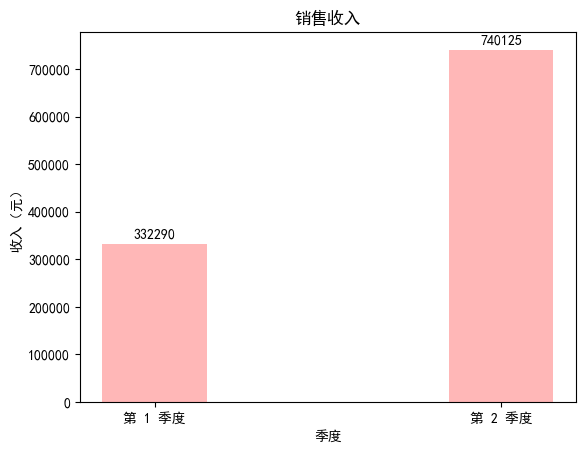

In [99]:
bar1 = plt.bar(np.arange(0, len(xiaoshoushouru.groupby('业务季度')['金额'].sum())),
               xiaoshoushouru.groupby('业务季度')['金额'].sum(), align='center', width=0.3, alpha=0.7, color='#ff9999',
               tick_label=["第 %d 季度" % (i) for i in sorted(list(set(xiaoshoushouru['业务季度'])))])

plt.bar_label(bar1, padding=3)

#展示结果
plt.title('销售收入')
plt.xlabel('季度')
plt.ylabel('收入（元）')
plt.show()

In [100]:
zhichu = guanggaozhichu.groupby('投放月份')['支出'].sum()
zhichu

投放月份
1    13985.51
2     6265.78
3    12116.45
4    15832.77
5    18064.53
6    57013.59
Name: 支出, dtype: float64

In [101]:
shouru = xiaoshoushouru.groupby('业务月份')['金额'].sum()
shouru

业务月份
1      5641.40
2    116830.00
3    209818.38
4    194799.94
5    184986.74
6    360338.74
Name: 金额, dtype: float64

## 线性回归模型

In [102]:
Y = shouru
Y[1] *= 31
X = np.array(pd.concat([zhichu], axis=1))
Y = np.array(Y)

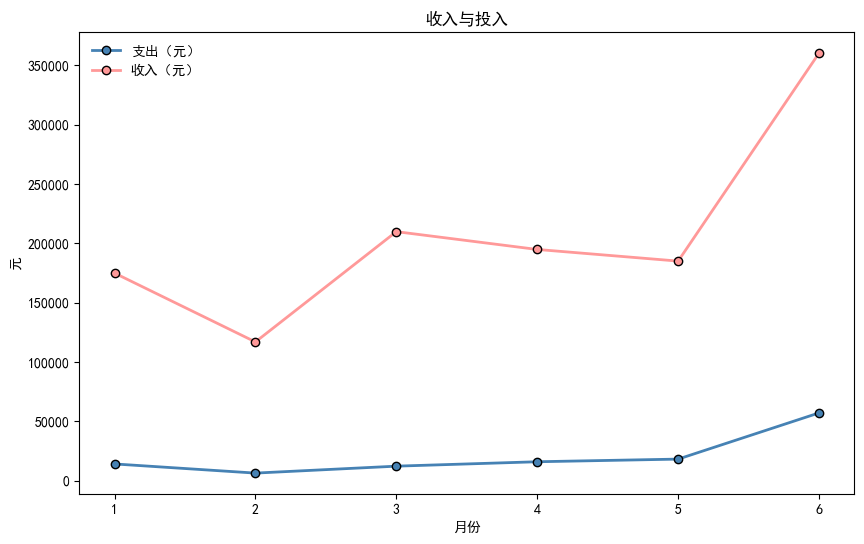

In [103]:
fig = plt.figure(figsize=(10, 6))

# 绘图，做折线图
plt.plot([1, 2, 3, 4, 5, 6],  #x轴
         zhichu,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='steelblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='steelblue',  # 点的填充色
         label='支出（元）'  #标签
         )
plt.plot([1, 2, 3, 4, 5, 6],  #x轴
         shouru,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='#ff9999',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='#ff9999',  # 点的填充色
         label='收入（元）'  #标签
         )

plt.title('收入与投入')
plt.xlabel('月份')
plt.ylabel('元')

plt.legend(loc='best', frameon=False)  #图例，显示label，去掉边框

0.9227387835994822


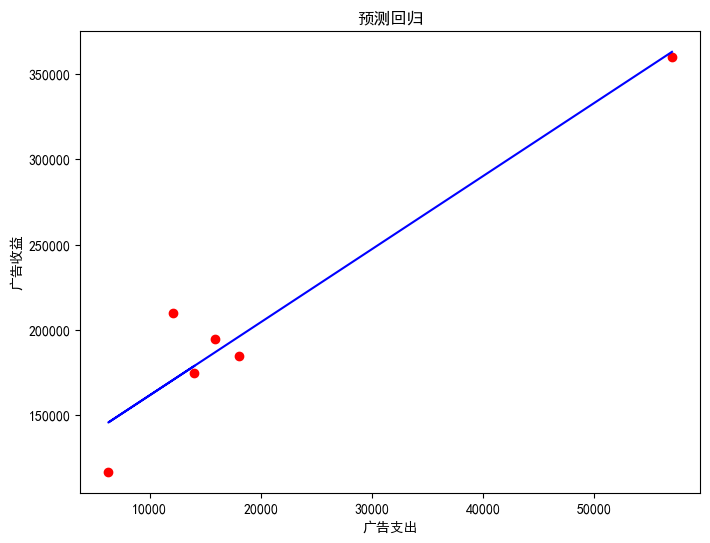

In [104]:
x = pd.DataFrame(X)
y = pd.DataFrame(Y)
clf = linear_model.LinearRegression()
clf.fit(x, y)
z = clf.predict(x)
print(clf.score(X, Y))

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='r')
# plt.scatter(78000, z[-1], color='k')
plt.plot(X, z, color="b")
plt.title("预测回归")
plt.xlabel("广告支出")
plt.ylabel("广告收益")
plt.show()

In [105]:
X = np.array(X)
Y = np.array(Y)

In [106]:
model = LR()
model.fit(X, Y)
model = LR().fit(X, Y)

In [111]:
r_sq = model.score(X, Y)
print('相关系数', r_sq)
print('截距:', model.intercept_)
print('回归系数:', model.coef_)

决定系数 0.9227387835994822
截距: 118953.41428301932
回归系数: [4.2824674]


In [108]:
model.coef_ * 78000 + model.intercept_

array([452985.87161603])

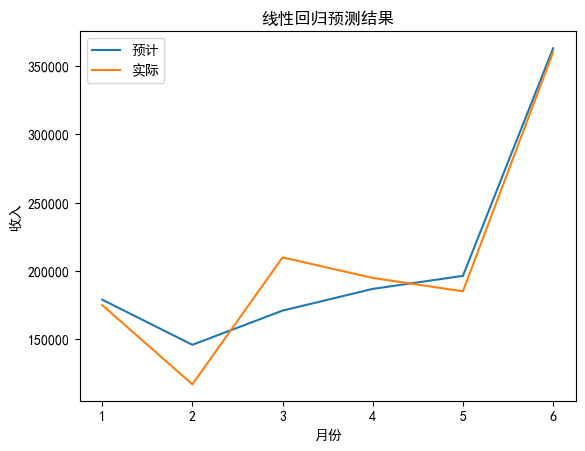

In [109]:
plt.plot(range(1, len(shouru) + 1), [model.coef_ * i + model.intercept_ for i in list(zhichu)])
plt.plot(range(1, len(shouru) + 1), shouru)

plt.xlabel('月份')
plt.ylabel('收入')
plt.title('线性回归预测结果')
plt.legend(['预计', '实际'])